# HW2 - Q1: Least Squares Regression (30 points)
Notes:
* Question (a) needs to be typewritten.
* Questions (b), (c), and (d) need to be programmed.
* Important:
  * Write all the steps of the solution. 
  * Use proper LATEX formatting and notation for all mathematical equations, vectors, and matrices. 
* For programming solution:
  * Properly add comments to your code.

#### <font color="red">A note about notation:</font>
The notations in this homework are slightly different from the lecture notes. In lecture, we use notation for data as: $(t_i, y_i)$ with regressor $\hat{y}=x^\top t$, $x$ is a vector of unknown coefficients and solve $Ax=b$.\
In this homework, the notation that we use for data is: $(x_i, y_i)$ with regressor $\hat{y}=\beta^\top x$ and $\beta$ is a vector of unknown coefficients to be solved.




---



### **(a)** Consider a dataset with $m$ datapoints: $(x_i, y_i), i=1,...,m$. Perform the multivariate calculus derivation of the least squares regression formula for an estimation function $𝑦̂(𝑥)=𝑎𝑥^2+𝑏𝑥+𝑐$, where $a,b, \text{and } c$ are the scalar parameters. (6 points)

#### <font color="red">Your answer here:</font>

We can write the function in matrix form:
$$
Y = XB + E
$$
where
$$
Y = 
\begin{bmatrix}
 y_1 \\ y_2 \\ \vdots \\ y_m
\end{bmatrix}\\
X = 
\begin{bmatrix}
 x_1^2 & x_1 & 1 \\
 x_2^2 & x_2 & 1 \\
 \vdots & \vdots & \vdots \\
 x_m^2 & x_m & 1
\end{bmatrix}\\
B = 
\begin{bmatrix}
 a \\ b \\ c
\end{bmatrix}\\
E = 
\begin{bmatrix}
 e_1 \\ e_2 \\ \vdots \\ e_m
\end{bmatrix}\\
$$
We have that
$$
B = (X^TX)^{-1}X^TY
$$

The estimation function $𝑦̂(𝑥)=𝑎𝑥^2+𝑏𝑥+𝑐$ can be seen as $𝑦̂(𝑥)=𝑎𝑥_1+𝑏𝑥_2+𝑐$. Therefore, we can denote the following:
$$
S_{xx} = \sum_{i=1}^{m} x_i^2 - \frac{(\sum_{i=1}^{m} x_i)^2}{m} \\
S_{xy} = \sum_{i=1}^{m} x_i y_i - \frac{\sum_{i=1}^{m} y_i \sum_{i=1}^{m} x_i}{m} \\
S_{xx^2} = \sum_{i=1}^{m} x_i^3 - \frac{\sum_{i=1}^{m} x_i \sum_{i=1}^{m} x_i^2}{m} \\
S_{x^2y} = \sum_{i=1}^{m} x_i^2 y_i - \frac{\sum_{i=1}^{m} y_i \sum_{i=1}^{m} x_i^2}{m} \\
S_{x^2x^2} = \sum_{i=1}^{m} x_i^4 - \frac{(\sum_{i=1}^{m} x_i^2)^2}{m} \\
S_{x} = \frac{\sum_{i=1}^{m} x_i}{m} \\
S_{x^2} = \frac{\sum_{i=1}^{m} x_i^2}{m} \\
S_{y} = \frac{\sum_{i=1}^{m} y_i}{m} \\
$$

The solutions to the unknown coefficients are:

$$
a = \frac{S_{x^2y} S_{xx} - S_{xy} S_{xx^2}}{S_{xx} S_{x^2x^2} - (S_{xx^2})^2} \\
b = \frac{S_{xy} S_{x^2x^2} - S_{x^2y} S_{xx^2}}{S_{xx} S_{x^2x^2} - (S_{xx^2})^2} \\
c = S_{y} - bS_{x} - aS_{x^2}\\
$$

Therefore, the coefficient matrix can be written as:
$$
B = 
\begin{bmatrix}  
\frac{S_{x^2y} S_{xx} - S_{xy} S_{xx^2}}{S_{xx} S_{x^2x^2} - (S_{xx^2})^2} \\
\frac{S_{xy} S_{x^2x^2} - S_{x^2y} S_{xx^2}}{S_{xx} S_{x^2x^2} - (S_{xx^2})^2} \\
S_{y} - bS_{x} - aS_{x^2}\\
\end{bmatrix}\\
\\
$$



---


### **(b)** In this problem, we would like to use a linear regressor to fit the data, where $\hat{y}(x)=ax+b$ with $a,b,x$ being scalars. Denote $\beta_{LS} = \begin{bmatrix} a \\ b \end{bmatrix}$ to contain the regressor coefficients, and recall that the linear algebraic formula for least squares gives $\beta_{LS} = (A^\top A)^{-1} A^\top y$ with $A^\dagger=(A^\top A)^{-1} A^\top$ known as the pseudo-inverse of $A$. 

### In this problem, we ask you to 
### **#1.** Use the function `np.linalg.pinv` to find the values of regressor coefficients $\beta_{LS} $ and match it with your previous result. Note that the following piece of starter code generates a random least squares regression dataset with 500 data-points. 


### **#2.** Further match your results by directly solving the problem using the builtin numpy function: `np.linalg.lstsq`
### **#3.** Plot a graph between $X$ and $y$, and overlay it with the linear regression line. (6 points)

In [1]:
### !!! DO NOT EDIT !!!
# starter code to generate a random least squares regression dataset with 500 points
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from sklearn import datasets

# generate x and y
X, y =  datasets.make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1, bias=10, noise=25, random_state=42, coef=False)
print('Shape of X is:', X.shape)
print('Shape of y is:', y.shape)

Shape of X is: (500, 1)
Shape of y is: (500,)


In [2]:
#######
# !!! YOUR CODE HERE !!!

#1

# Normal NumPy matrix operations
def normal_equation(X, Y):
    X = np.insert(X.T, 0, 1, axis=0)
    X_cross = np.dot(np.linalg.inv(np.dot(X, X.T)), X)
    beta = np.dot(X_cross, y)
    return beta
beta1 = normal_equation(X, y)
print("Normal NumPy matrix operations gives us: ", beta1)

Normal NumPy matrix operations gives us:  [ 9.02058667 63.18605572]


In [45]:
# Using function np.linalg.pinv
def pinv_fit(X, y):
    X = np.insert(X.T, 0, 1, axis=0)
    X_cross = np.dot(np.linalg.pinv(np.dot(X, X.T)), X)
    beta = np.dot(X_cross, y)
    return beta
beta2 = pinv_fit(X, y)
print("Using function np.linalg.pinv gives us: ", beta2)

Using function np.linalg.pinv gives us:  [ 9.02058667 63.18605572]


We can see that the two operations gives us the same results

In [48]:
#2

#Using function np.linalg.lstsq
A = np.column_stack([np.ones(len(X), float), X])
beta3 = np.linalg.lstsq(A, y, rcond=None)[0]
print("Using function np.linalg.lstsq gives us: ", beta3)

Using function np.linalg.lstsq gives us:  [ 9.02058667 63.18605572]


We can see that using function np.linalg.lstsq also gives us the same results.

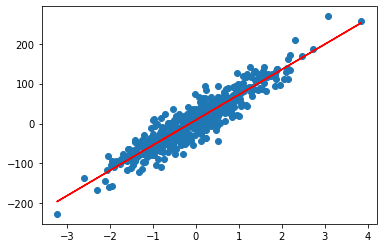

In [5]:
# Generate predictions
def predict(X_test, beta):
    X_test = np.insert(X_test.T, 0, 1, axis=0)
    predictions = np.dot(beta, X_test)
    return predictions
predictions = predict(X, beta1)

# plot data and predictions
plt.scatter(X, y)
plt.plot(X, predictions, color='red')

#######



---



### **(c)** In this problem, we ask you to 
### **#1.** Write a function `my_func_fit (X,y)`, where `X` and `y` are column vectors of the same size containing experimental data. The function should return the values for $\alpha$ and $\beta$ which are the scalar parameters of the estimation function $𝑦̂ (𝑥)=𝛼𝑥^𝛽$.
### **#2.** Test your code on the generated sample dataset and report the coefficients. The given piece of starter code generates a logarithmic dataset. 
### **#3.** Plot a graph between $X$ vs $y$, and overlay it with the linear regression line. (8 points)

**Linear regression for non-linear estimation function:** 

In [3]:
### !!! DO NOT EDIT !!!
# starter code to generate a random exponential dataset
X = np.linspace(1, 10, 101)
y = 2*(X**(0.3)) + 0.3*np.random.random(len(X))
print('Shape of X is:', X.shape)
print('Shape of y is:', y.shape)

Shape of X is: (101,)
Shape of y is: (101,)


In [4]:
#######
# !!! YOUR CODE HERE !!!

We can model the data using model:
$$
log(y) = log(\alpha) + \beta log(x)
\\
$$
This can be seen as a simple linear regression, and the code is similar to the previous question.
$$
\\
$$

In [8]:
import math
import numpy as np

# function for modeling the data
def my_func_fit(X, y):
    A = np.vstack([np.log(X), np.ones(len(X))]).T
    beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
    alpha = np.exp(log_alpha)
    return alpha, beta
alpha, beta = my_func_fit(X, y)

print("The coefficients: ",(alpha, beta))

The coefficients:  (2.1383591787044627, 0.2864299526632125)


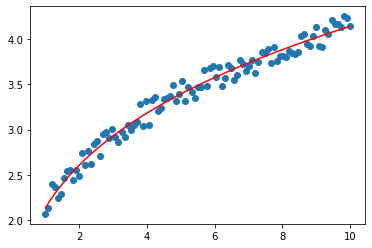

In [9]:
# Generate predictions
def predict(X_test, alpha, beta):
    return alpha*(X_test**beta)
predictions = predict(X, alpha, beta)

# plot data and predictions
plt.scatter(X, y)
plt.plot(X, predictions, color='red')

#######



---



### **(d)** In this problem, we ask you to 

### **#1.** Write a function `my_lin_regression(f, X, y)`, where `f` is a list containing function objects to basis functions that are pre-defined, and `X` and `y` are arrays containing noisy data. Assume that `X` and `y` are the same size, i.e, $X^{(i)}\in \mathbb{R}, y^{(i)}\in \mathbb{R}$. Return an array `beta` which represent the coefficients of the solved problem. I.e. we are solving the $\beta$ which contains the coefficients in the regressor $𝑦̂ (𝑥)=𝛽_1⋅𝑓_1(x)+𝛽_2⋅𝑓_2(x)+⋯+𝛽_n⋅𝑓_n(𝑥)$ with $f_i$ being basis functions. 

### **#2.** Also write a function `regression_plot(f,X,y,beta)` which plots a graph between `X` and `y`, and overlays it with the regression line. A few test scenarios are given to validate your code. (10 points)

In [178]:
#######
# !!! YOUR CODE HERE !!!
import numpy as np
def my_lin_regression(f, X, y):
    A = np.ones(len(X))
    for i in f:
        A = np.vstack([A, i(X)])
    A = A[1:]
    A_cross = np.dot(np.linalg.pinv(np.dot(A, A.T)), A)
    betas = np.dot(A_cross, y)
    return betas

def regression_plot(f,X,y,beta):
    plt.scatter(X, y)
    predictions = np.zeros(len(X))
    for i in range(len(f)):
        predictions += beta[i]*f[i](X)
    plt.plot(X, predictions, color='red')
    return 
#######

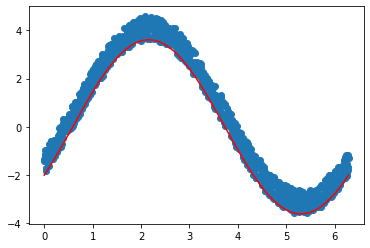

In [182]:
### !!! DO NOT EDIT !!!
### Test-1
X = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(X) - 2*np.cos(X) + np.random.random(len(X))
f = [np.sin, np.cos] # f1 = sin, f2 = cos

beta = my_lin_regression(f, X, y)
regression_plot(f,X,y,beta)

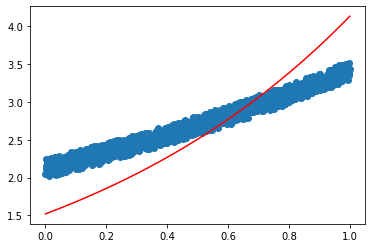

In [180]:
### !!! DO NOT EDIT !!!
### Test-2
X = np.linspace(0, 1, 1000)
y = 2*np.exp(0.5*X) + 0.25*np.random.random(len(X))
f = [np.exp] # f1 = exp

beta = my_lin_regression(f, X, y)
regression_plot(f,X,y,beta)



---



---

